Name:Ayushi Verma

In [64]:
!pip install pulp matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pulp import LpProblem, LpVariable, lpSum, LpMaximize, LpStatus, value

In [66]:
df = pd.read_csv(r"C:\Users\Ayushi Verma\Downloads\products.csv") 

In [67]:
print("Loaded dataset:")
df.head()

Loaded dataset:


,product_id,product_name,aisle_id,department_id,price
0,1,Chocolate Sandwich Cookies,61,19,12.56
1,2,All-Seasons Salt,104,13,28.86
2,3,Robust Golden Unsweetened Oolong Tea,94,7,25.67
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,39.60
4,5,Green Chile Anytime Sauce,5,13,42.96


In [68]:
print(df.columns)

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'price'], dtype='object')


In [69]:
max_budget = 500  
unit_cost = df['price'] * 0.6

In [70]:
model = LpProblem("ProductSelection", LpMaximize)

In [71]:
x = {row['product_id']: LpVariable(f"x_{row['product_id']}", cat='Binary') for idx, row in df.iterrows()}


In [72]:
model += lpSum([row['price'] * x[row['product_id']] for idx, row in df.iterrows()]), "TotalProfit"


In [73]:
model += lpSum([unit_cost[idx] * x[row['product_id']] for idx, row in df.iterrows()]) <= max_budget, "BudgetConstraint"

In [74]:
model.solve()

1

In [75]:
print(f"Status: {LpStatus[model.status]}")
solution = []
for idx, row in df.iterrows():
    if x[row['product_id']].varValue == 1:
        solution.append({
            'ProductID': row['product_id'],
            'ProductName': row['product_name'],
            'Price': row['price']
        })

Status: Optimal


In [76]:
solution_df = pd.DataFrame(solution)
print("\nSelected Products:")
print(solution_df)

print(f"\nTotal Profit (Price Sum): {value(model.objective)}")


Selected Products:
    ProductID                                        ProductName  Price
0          84                                         Lamb Shank  44.89
1          90                                       Smorz Cereal  19.71
2          92             Meat In The Middle Large Rawhide Chews  41.84
3          93                        Uncured Cracked Pepper Beef  39.88
4          97                        Organic Chamomile Lemon Tea  44.58
5         109                             Grape Leaf Hummus Wrap  12.46
6         168                            Halves & Pieces Walnuts  36.30
7         516                             American Cheese Slices  39.94
8         802                          Organic Super Berry Juice  17.96
9         806                         100% Cranberry Juice Blend  31.75
10        816                        Calcium Lime & Rust Remover  13.02
11        849  Blueberry & Banana Tiny Fruits Freeze Dried Sn...  24.97
12        860  Chicago Steak & Chop Cracked 

C:\Users\Ayushi Verma\AppData\Local\Temp\ipykernel_22868\2740623470.py:6: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



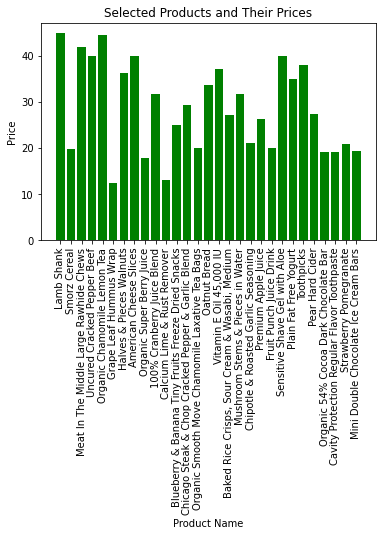

In [77]:
plt.bar(solution_df['ProductName'], solution_df['Price'], color='green')
plt.xticks(rotation=90)
plt.title('Selected Products and Their Prices')
plt.xlabel('Product Name')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

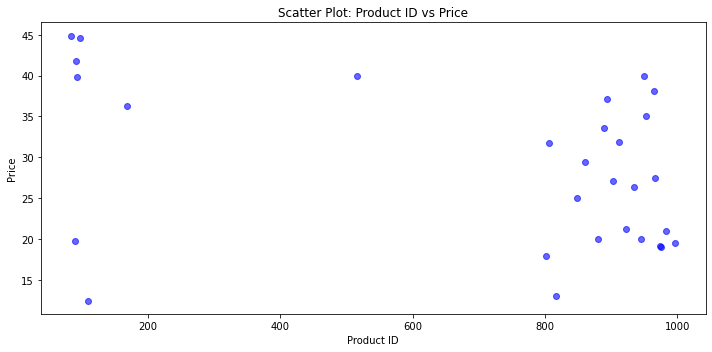

In [78]:
plt.figure(figsize=(10, 5))
plt.scatter(solution_df['ProductID'], solution_df['Price'], c='blue', alpha=0.6)
plt.title('Scatter Plot: Product ID vs Price')
plt.xlabel('Product ID')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


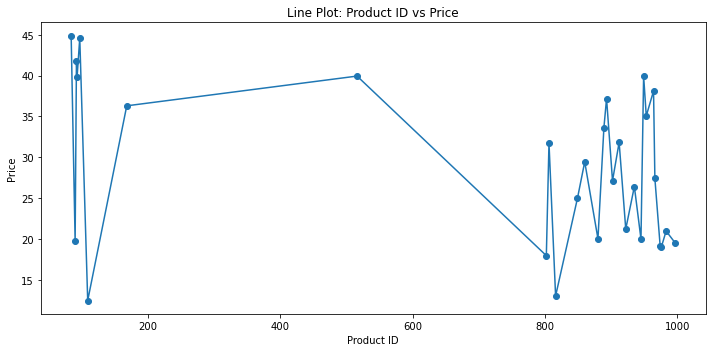

In [79]:
sorted_df = solution_df.sort_values('ProductID')
plt.figure(figsize=(10, 5))
plt.plot(sorted_df['ProductID'], sorted_df['Price'], marker='o', linestyle='-')
plt.title('Line Plot: Product ID vs Price')
plt.xlabel('Product ID')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [80]:
solution = []
for idx, row in df.iterrows():
    var_value = x[row['product_id']].varValue or 0
    solution.append({
        'ProductID': row['product_id'],
        'ProductName': row['product_name'],
        'Price': row['price'],
        'Selected': int(round(var_value))
    })
solution_df = pd.DataFrame(solution)
selected_df = solution_df[solution_df['Selected'] == 1]



In [81]:
print(f"Optimization Status: {LpStatus[model.status]}")
print(f"Total Profit: {value(model.objective)}")
print(f"Budget Used: {np.sum(unit_cost[selected_df.index])} / {max_budget}")
print("\nSelected Products:\n", selected_df[['ProductID', 'ProductName', 'Price']])


Optimization Status: Optimal
Total Profit: 833.3299999999999
Budget Used: 499.998 / 500

Selected Products:
      ProductID                                        ProductName  Price
83          84                                         Lamb Shank  44.89
89          90                                       Smorz Cereal  19.71
91          92             Meat In The Middle Large Rawhide Chews  41.84
92          93                        Uncured Cracked Pepper Beef  39.88
96          97                        Organic Chamomile Lemon Tea  44.58
108        109                             Grape Leaf Hummus Wrap  12.46
167        168                            Halves & Pieces Walnuts  36.30
515        516                             American Cheese Slices  39.94
801        802                          Organic Super Berry Juice  17.96
805        806                         100% Cranberry Juice Blend  31.75
815        816                        Calcium Lime & Rust Remover  13.02
848        849 

Columns in solution_df: ['ProductID', 'ProductName', 'Price', 'Selected']


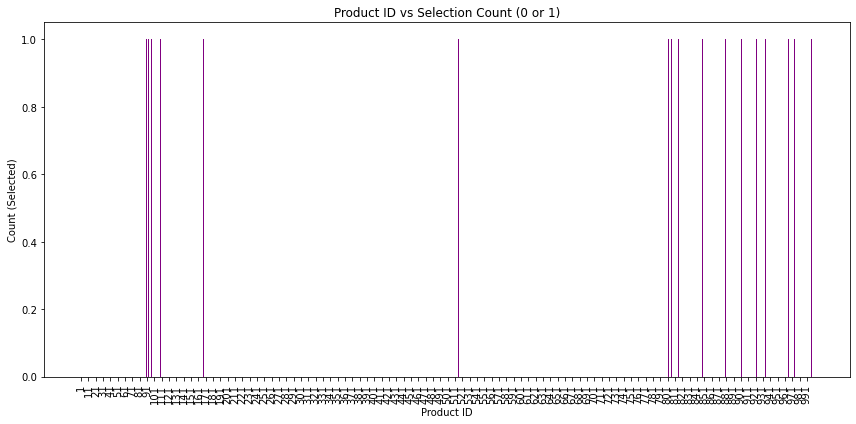

In [82]:
# --- VISUALIZATION 4: Product ID vs Count (Selected or Not) ---
print("Columns in solution_df:", solution_df.columns.tolist())  # debug check

count_df = solution_df.groupby('ProductID')['Selected'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(count_df['ProductID'].astype(str), count_df['Selected'], color='purple')
plt.title('Product ID vs Selection Count (0 or 1)')
plt.xlabel('Product ID')
plt.ylabel('Count (Selected)')

# Thin x-ticks: show every 10th label
tick_labels = count_df['ProductID'].astype(str)
plt.xticks(ticks=range(0, len(tick_labels), 10), labels=tick_labels[::10], rotation=90)

plt.tight_layout()
plt.show()



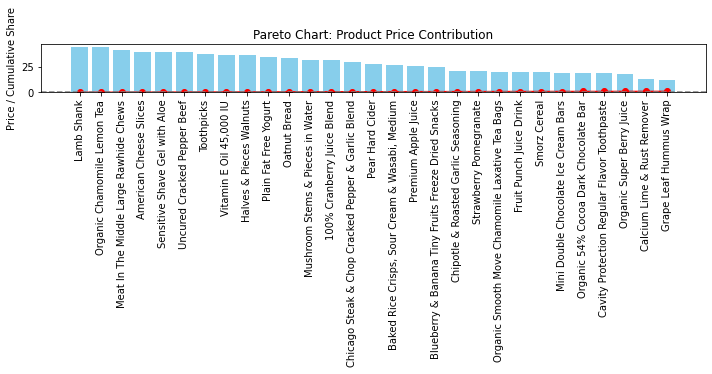

In [83]:
sorted_by_price = selected_df.sort_values('Price', ascending=False)
sorted_by_price['Cumulative'] = sorted_by_price['Price'].cumsum() / sorted_by_price['Price'].sum()
plt.figure(figsize=(10, 5))
plt.bar(sorted_by_price['ProductName'], sorted_by_price['Price'], color='skyblue')
plt.plot(sorted_by_price['ProductName'], sorted_by_price['Cumulative'], color='red', marker='o')
plt.axhline(0.8, color='gray', linestyle='--')
plt.title('Pareto Chart: Product Price Contribution')
plt.xticks(rotation=90)
plt.ylabel('Price / Cumulative Share')
plt.tight_layout()
plt.show()

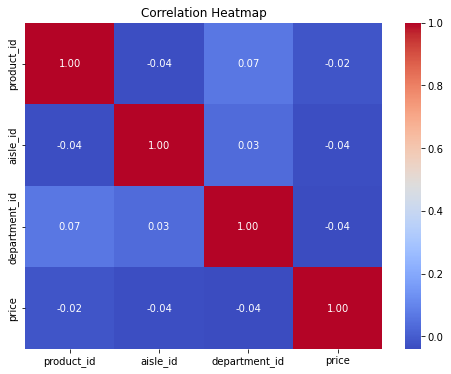

In [84]:
numeric_cols = df.select_dtypes(include=np.number)
if len(numeric_cols.columns) > 1:
    corr = numeric_cols.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

In [85]:
total_spent = np.sum(unit_cost[selected_df.index])
total_savings = max_budget - total_spent
print(f"\n💡 You saved ${total_savings:.2f} from your max budget of ${max_budget:.2f}.")


💡 You saved $0.00 from your max budget of $500.00.


In [86]:
solution_df.to_csv('optimal_product_selection.csv', index=False)
print("\n✅ Results saved to 'optimal_product_selection.csv'.")


✅ Results saved to 'optimal_product_selection.csv'.


In [87]:
print("\n📊 PROJECT SUMMARY REPORT")
print(f"Total Products Evaluated: {len(df)}")
print(f"Total Products Selected: {len(selected_df)}")
print(f"Total Profit Achieved: ${value(model.objective):.2f}")
print(f"Budget Utilization: ${total_spent:.2f} / ${max_budget:.2f}")
print(f"Savings Left: ${total_savings:.2f}")



📊 PROJECT SUMMARY REPORT
Total Products Evaluated: 999
Total Products Selected: 29
Total Profit Achieved: $833.33
Budget Utilization: $500.00 / $500.00
Savings Left: $0.00


In [88]:
top_product = selected_df.loc[selected_df['Price'].idxmax()]
print(f"\n🌟 Top Product by Price: {top_product['ProductName']} (ID: {top_product['ProductID']}) - ${top_product['Price']:.2f}")



🌟 Top Product by Price: Lamb Shank (ID: 84) - $44.89



🔍 Visualizing Constraints and Feasible Region (Based on Product Data)


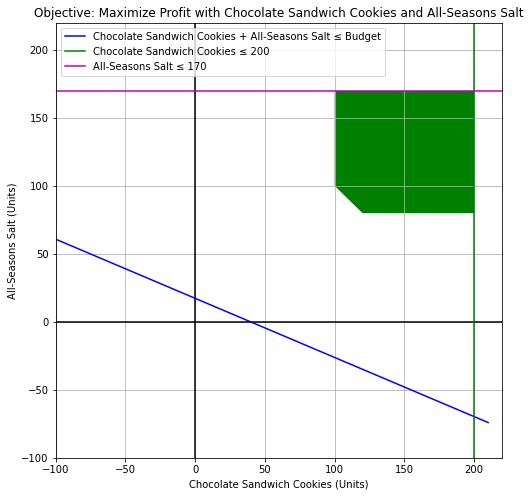

In [89]:
import numpy as np
import matplotlib.pyplot as plt

print("\n🔍 Visualizing Constraints and Feasible Region (Based on Product Data)")

# Select top two products (or most relevant) for A and B demo
if len(solution_df) < 2:
    print("⚠ Not enough selected products to plot 2D constraints.")
else:
    product_A = solution_df.iloc[0]
    product_B = solution_df.iloc[1]

    # Use price as value proxies
    A_range = np.arange(-100, 220, 10)
    B_range = np.arange(-100, 220, 10)

    # Example constraint line: price_A + price_B ≤ budget
    B1 = (max_budget / product_B['Price']) - (product_A['Price'] / product_B['Price']) * A_range

    plt.figure(figsize=(8, 8))
    plt.xlim(-100, 220)
    plt.ylim(-100, 220)
    plt.hlines(0, -100, 220, color='k')
    plt.vlines(0, -100, 220, color='k')
    plt.grid(True)

    plt.xlabel(f"{product_A['ProductName']} (Units)")
    plt.ylabel(f"{product_B['ProductName']} (Units)")

    # Plot constraint line
    plt.plot(A_range, B1, color='b', label=f"{product_A['ProductName']} + {product_B['ProductName']} ≤ Budget")
    plt.axvline(x=200, color='g', label=f"{product_A['ProductName']} ≤ 200")
    plt.axhline(y=170, color='m', label=f"{product_B['ProductName']} ≤ 170")

    plt.title(f"Objective: Maximize Profit with {product_A['ProductName']} and {product_B['ProductName']}")
    plt.legend()

    # Define feasible corner points (example only; replace with real ones if needed)
    A_points = [200.0, 100.0, 100.0, 120.0, 200.0]
    B_points = [170.0, 170.0, 100.0, 80.0, 80.0]
    plt.fill(A_points, B_points, 'g+', label='Feasible Region')

    plt.show()

    

In [90]:
# --- MANUAL BEST POINT CHECK ---
checker = float('-inf')
for i, j in zip(A_points, B_points):
    z = product_B['Price'] * j + product_A['Price'] * i  # Adjust formula to your objective
    print(f'\nCalculating for point: {product_A["ProductName"]} = {i:.1f}, {product_B["ProductName"]} = {j:.1f}')
    print(f'Solution Z = {z:.2f}')
    if z >= checker:
        checker = z
        best_A, best_B = i, j

print(f'\n✅ Maximum Profit (Manual Check) Z = ${checker:.2f} at {product_A["ProductName"]} = {best_A}, {product_B["ProductName"]} = {best_B}')



Calculating for point: Chocolate Sandwich Cookies = 200.0, All-Seasons Salt = 170.0
Solution Z = 7418.20

Calculating for point: Chocolate Sandwich Cookies = 100.0, All-Seasons Salt = 170.0
Solution Z = 6162.20

Calculating for point: Chocolate Sandwich Cookies = 100.0, All-Seasons Salt = 100.0
Solution Z = 4142.00

Calculating for point: Chocolate Sandwich Cookies = 120.0, All-Seasons Salt = 80.0
Solution Z = 3816.00

Calculating for point: Chocolate Sandwich Cookies = 200.0, All-Seasons Salt = 80.0
Solution Z = 4820.80

✅ Maximum Profit (Manual Check) Z = $7418.20 at Chocolate Sandwich Cookies = 200.0, All-Seasons Salt = 170.0


In [91]:
try:
    import deap
except ImportError:
    !pip install deap

import random
from deap import base, creator, tools, algorithms

In [93]:
best_ind = tools.selBest(population, 1)[0]
selected = df[[bool(x) for x in best_ind]]
print("Selected products:")
print(selected[['product_id', 'product_name', 'price']])
print("Total cost:", sum(selected['price']))

Selected products:
     product_id                          product_name  price
0             1            Chocolate Sandwich Cookies  12.56
1             2                      All-Seasons Salt  28.86
4             5             Green Chile Anytime Sauce  42.96
5             6                          Dry Nose Oil  40.04
8             9     Light Strawberry Blueberry Yogurt  17.62
..          ...                                   ...    ...
990         991                 Red Sweet Mini Pepper  26.68
994         995     Sausage Smoked Sweet German Brand  19.09
995         996    Honey Cinnamon Nut-Thins  Crackers  32.26
996         997  Mini Double Chocolate Ice Cream Bars  19.48
997         998               Hot Chopped Green Chili  22.06

[502 rows x 3 columns]
Total cost: 14039.480000000007


In [94]:
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, clear_output


In [95]:
assert 'price' in df.columns, "Your dataset must contain a 'price' column"

prices = df['price'].values
n_products = len(df)


In [96]:
budget_slider = widgets.IntSlider(value=1000, min=100, max=10000, step=100, description='Max Budget ₹:')
run_button = widgets.Button(description="Run Optimization", button_style='success')
output_area = widgets.Output()

display(budget_slider, run_button, output_area)

IntSlider(value=1000, description='Max Budget ₹:', max=10000, min=100, step=100)

Button(button_style='success', description='Run Optimization', style=ButtonStyle())

Output()

In [97]:
def on_run_clicked(b):
    with output_area:
        clear_output()

        max_budget = budget_slider.value

        # GA setup inside function to prevent multiple DEAP creator errors
        try:
            del creator.FitnessMax
            del creator.Individual
        except:
            pass
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

C:\Users\Ayushi Verma\AppData\Roaming\Python\Python39\site-packages\deap\creator.py:185: RuntimeWarning:

A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.

C:\Users\Ayushi Verma\AppData\Roaming\Python\Python39\site-packages\deap\creator.py:185: RuntimeWarning:

A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.



In [98]:
 toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n_products)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [99]:
 def eval_ind(individual):
        total_cost = sum(individual[i] * prices[i] for i in range(n_products))
        if total_cost > max_budget:
            return 0,
        return total_cost,

toolbox.register("evaluate", eval_ind)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)



In [100]:
pop = toolbox.population(n=50)
algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, verbose=False)

best = tools.selBest(pop, 1)[0]
selected = df[[bool(x) for x in best]].copy()
total_price = selected['price'].sum()

print(f"🎯 Total selected cost: ₹{total_price:.2f}")
display(selected[['product_id', 'product_name', 'price']])


🎯 Total selected cost: ₹14100.72


,product_id,product_name,price
0,1,Chocolate Sandwich Cookies,12.56
1,2,All-Seasons Salt,28.86
2,3,Robust Golden Unsweetened Oolong Tea,25.67
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,39.60
9,10,Sparkling Orange Juice & Prickly Pear Beverage,10.89
...,...,...,...
990,991,Red Sweet Mini Pepper,26.68
992,993,Mild Diced Tomatoes with Green Chilis,10.42
995,996,Honey Cinnamon Nut-Thins Crackers,32.26
996,997,Mini Double Chocolate Ice Cream Bars,19.48


In [102]:
fig = go.Figure(data=[go.Pie(
labels=selected['product_name'],
values=selected['price'],
textinfo='label+percent'
)])
fig.update_layout(title="📊 Selected Product Cost Distribution")
fig.show()

In [103]:
run_button.on_click(on_run_clicked)